# Análise de Clustering para Dados do Strava

In [ ]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Carregar os dados
file_path = 'strava_data.csv'  # Substitua pelo caminho correto
strava_data = pd.read_csv(file_path)

# Filtrar apenas atividades de corrida
running_data = strava_data[strava_data['sport'] == 'Run']

# Selecionar colunas relevantes
selected_columns = ["duration", "distance", "Max Heart Rate...8", "relative_effort"]
running_data = running_data[selected_columns].rename(columns={
    "Max Heart Rate...8": "max_heart_rate",
    "relative_effort": "effort"
})

running_data = running_data.dropna()
running_data["pace"] = (running_data["duration"] / 60) / running_data["distance"]
running_data['speed_m_s'] = (running_data['distance'] * 1000) / running_data["duration"]
running_data = running_data[
    (running_data['duration'] > 0) &
    (running_data['distance'] > 0) &
    (running_data['pace'] > 3) &
    (running_data['pace'] < 10) &
]

# Normalizar os dados APÓS a limpeza
scaler = StandardScaler()
running_data_scaled = scaler.fit_transform(running_data[['duration', 'distance', 'max_heart_rate', 'effort', 'pace', 'speed_m_s']])



In [ ]:
running_data.

count    2749.000000
mean        2.495758
std         0.174570
min         1.668857
25%         2.377457
50%         2.489331
75%         2.608472
max         3.963317
Name: speed_m_s, dtype: float64

## Método Elbow para Determinar o Número Ideal de Clusters

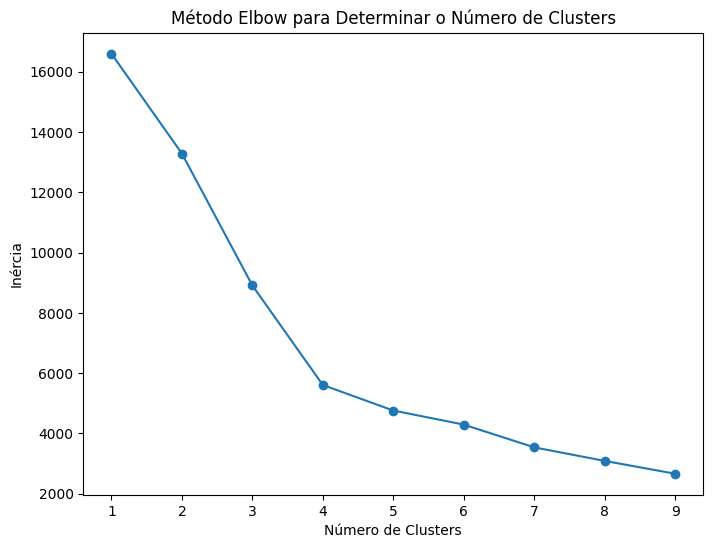

In [55]:

# Determinar o número de clusters (Elbow Method)
inertia = []
range_clusters = range(1, 10)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(running_data_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o método Elbow
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método Elbow para Determinar o Número de Clusters')
plt.show()
    

## Aplicar o K-Means e Analisar os Resultados

In [56]:

# Aplicar o K-Means com 4 clusters
optimal_clusters = 4
kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42)
running_data['cluster'] = kmeans_final.fit_predict(running_data_scaled)

# Salvar os resultados
running_data.to_csv('running_clusters.csv', index=False)
running_data['cluster'].value_counts()
    

cluster
0    2163
3     598
2       5
1       1
Name: count, dtype: int64

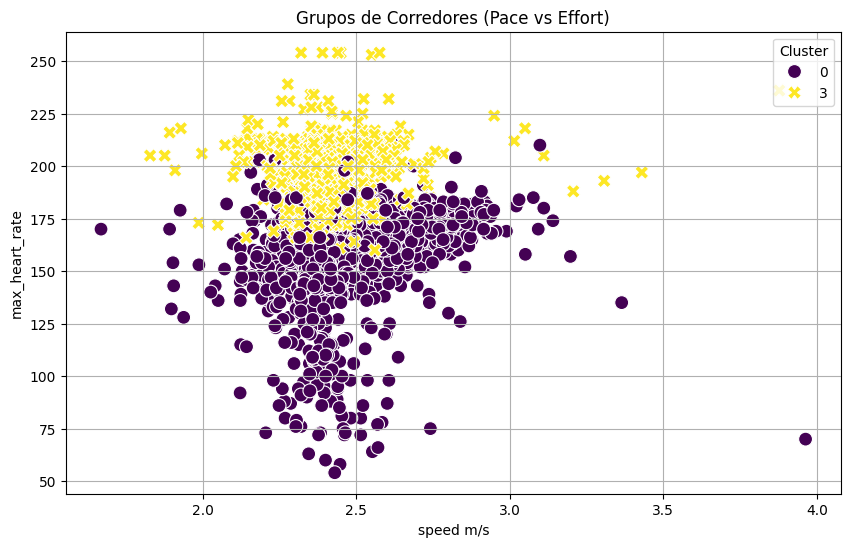

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o gráfico de dispersão com Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=running_data, 
    x='speed_m_s', 
    y='max_heart_rate', 
    hue='cluster', 
    palette='viridis', 
    style='cluster',
    s=100
)
plt.title('Grupos de Corredores (speed vs heart_rate)')
plt.xlabel('speed m/s')
plt.ylabel('max_heart_rate')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()


## Exemplificando o codigo na pratica


In [80]:
def assign_cluster(new_data):
    # Converter os dados do novo corredor para DataFrame
    new_data_df = pd.DataFrame([new_data], columns=['duration', 'distance', 'max_heart_rate', 'effort', 'pace', 'speed_m_s'])
    # Normalizar os dados do novo corredor
    new_data_scaled = scaler.transform(new_data_df)
    # Prever o cluster
    cluster_pred = kmeans_final.predict(new_data_scaled)
    return cluster_pred[0]

In [69]:
def generate_customized_training(cluster):
    # Definir os treinos com base no cluster
    training_plans = {
        0: "Treino leve: Corrida de 30-40 min a um pace moderado (5:30 min/km).",
        1: "Treino intermediário: Corrida de 40-60 min com intervalos (8 min/km por 5 minutos e 4:30 min/km por 3 minutos).",
        2: "Treino avançado: Corrida de 60-90 min com intervalos de alta intensidade (4:00 min/km por 10 minutos, 2:00 min/km por 5 minutos).",
        3: "Treino competitivo: Corrida de 90 minutos a 2 horas com pace variado (3:50 min/km nos 10 primeiros minutos, seguido de recuperação)."
    }
    
    # Retornar o plano de treino
    return training_plans.get(cluster, "Treino personalizado não disponível")

In [81]:
# Exemplo: Atribuindo um novo corredor a um cluster
new_runner_data = [4000, 10.0, 160, 50, 400]  # [duration in sexonds, distance in km, max_heart_rate, effort, pace in seconds] do novo corredor

new_runner_data[0] = new_runner_data[0] / 60 # duration in minutes
new_runner_data[4] = new_runner_data[4] / 60 # pace in minutes
speed_m_s = (new_runner_data[1] * 1000) / new_runner_data[0]
new_runner_data.append(speed_m_s)


new_cluster = assign_cluster(new_runner_data)

# Gerar o treino personalizado
personalized_training = generate_customized_training(new_cluster)
print(f"Cluster do corredor novo: {new_cluster}")
print(f"Treino personalizado: {personalized_training}")

Cluster do corredor novo: 0
Treino personalizado: Treino leve: Corrida de 30-40 min a um pace moderado (5:30 min/km).
